<a href="https://colab.research.google.com/github/amal1310/medical-insurance-charge-prediction/blob/main/linear_regretion(medical_insurance).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
from google.colab import files
files.upload()

Saving insurance (1).csv to insurance (1).csv


{'insurance (1).csv': b'age,sex,bmi,children,smoker,region,charges\r\n19,female,27.9,0,yes,southwest,16884.924\r\n18,male,33.77,1,no,southeast,1725.5523\r\n28,male,33,3,no,southeast,4449.462\r\n33,male,22.705,0,no,northwest,21984.47061\r\n32,male,28.88,0,no,northwest,3866.8552\r\n31,female,25.74,0,no,southeast,3756.6216\r\n46,female,33.44,1,no,southeast,8240.5896\r\n37,female,27.74,3,no,northwest,7281.5056\r\n37,male,29.83,2,no,northeast,6406.4107\r\n60,female,25.84,0,no,northwest,28923.13692\r\n25,male,26.22,0,no,northeast,2721.3208\r\n62,female,26.29,0,yes,southeast,27808.7251\r\n23,male,34.4,0,no,southwest,1826.843\r\n56,female,39.82,0,no,southeast,11090.7178\r\n27,male,42.13,0,yes,southeast,39611.7577\r\n19,male,24.6,1,no,southwest,1837.237\r\n52,female,30.78,1,no,northeast,10797.3362\r\n23,male,23.845,0,no,northeast,2395.17155\r\n56,male,40.3,0,no,southwest,10602.385\r\n30,male,35.3,0,yes,southwest,36837.467\r\n60,female,36.005,0,no,northeast,13228.84695\r\n30,female,32.4,1,no,sou

In [ ]:
insurance_dataset=pd.read_csv("insurance (1).csv")
insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance_dataset.shape

(1338, 7)

In [ ]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<ipython-input-7-67bec894a02c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset["age"])


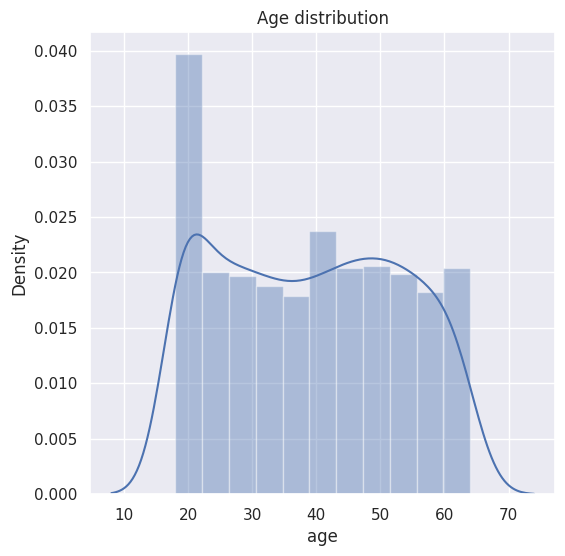

In [ ]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset["age"])
plt.title("Age distribution")
plt.show()


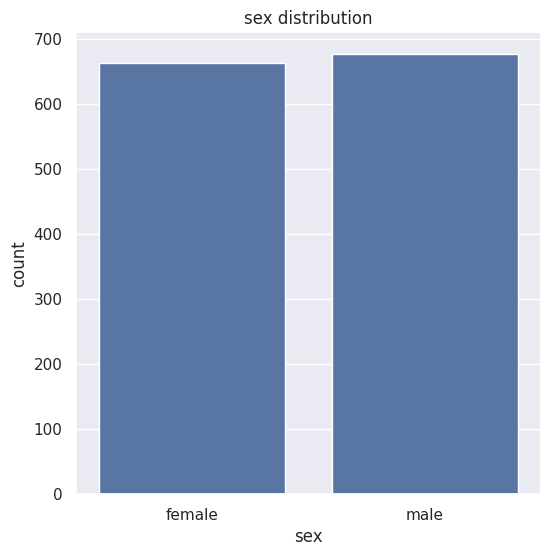

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x="sex",data=insurance_dataset)
plt.title("sex distribution")
plt.show()

In [ ]:
insurance_dataset["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

<Figure size 600x600 with 0 Axes>

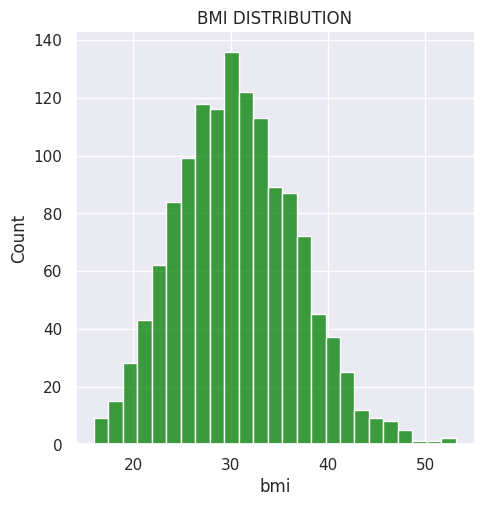

In [ ]:
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset["bmi"],color="green")
plt.title("BMI DISTRIBUTION")
plt.show()

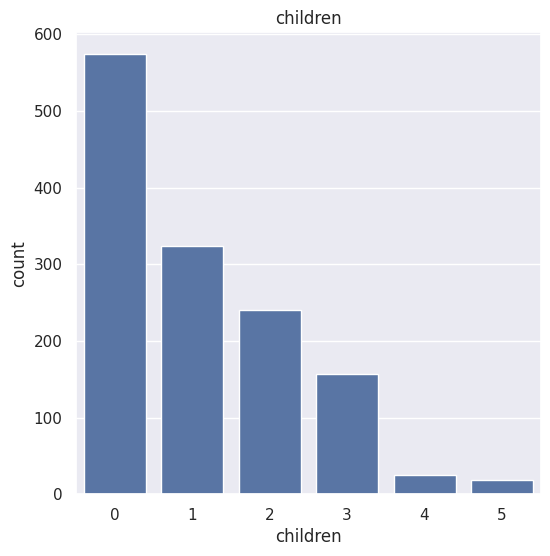

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x="children",data=insurance_dataset)
plt.title("children")
plt.show()


In [ ]:
insurance_dataset["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [ ]:
insurance_dataset["children"].value_counts().sum()

1338

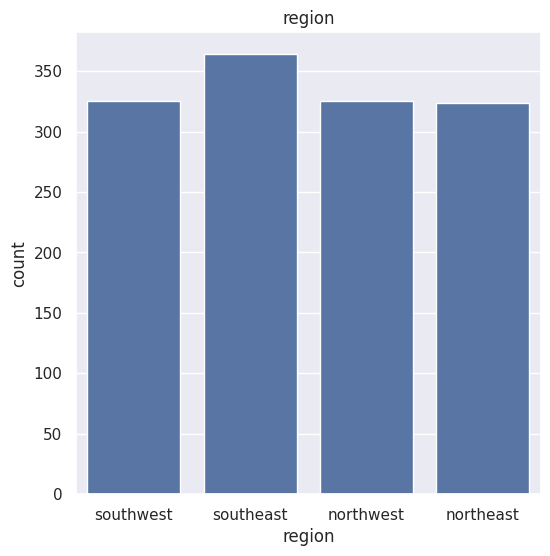

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x="region",data=insurance_dataset)
plt.title("region")
plt.show()

In [ ]:
insurance_dataset["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<ipython-input-16-58c9e6b75503>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset["charges"])


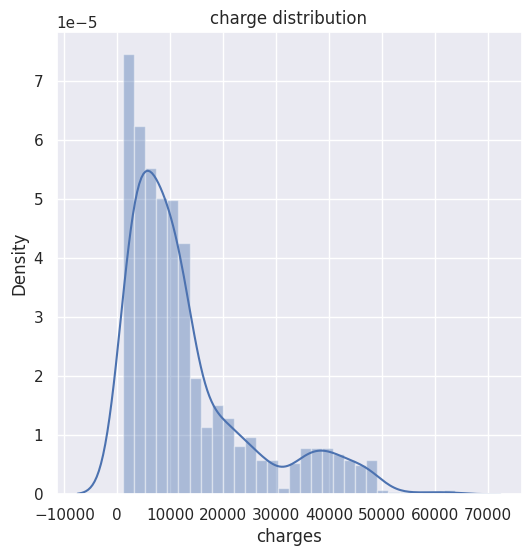

In [ ]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset["charges"])
plt.title("charge distribution")
plt.show()

In [ ]:
insurance_dataset.replace({"sex":{"male":0,"female":1}},inplace=True)

In [ ]:
insurance_dataset.replace({"smoker":{"yes":0,"no":1}},inplace=True)

In [ ]:
insurance_dataset.replace({"region":{"southeast":0,"southwest":1,"northeast":2,"northwest":3}},inplace=True)

In [ ]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [ ]:
x=insurance_dataset.drop(columns="charges",axis=1)
y=insurance_dataset["charges"]

In [ ]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [ ]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)


In [ ]:
print(x.shape,x_train.shape,x_test.shape)


(1338, 6) (1070, 6) (268, 6)


In [ ]:
model=LinearRegression()


In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
training_data_prediction=model.predict(x_train)

In [ ]:
r2_train=metrics.r2_score(y_train,training_data_prediction)
print("r squared value: ,r2_train")

r squared value: ,r2_train


In [ ]:
test_data_prediction=model.predict(x_test)

In [ ]:
r2_test=metrics.r2_score(y_test,test_data_prediction)
print("r squared value : ",r2_test)

r squared value :  0.7447273869684076


In [ ]:
x_train

,age,sex,bmi,children,smoker,region
882,21,1,22.135,0,1,2
505,37,0,30.875,3,1,3
798,58,1,33.100,0,1,1
792,22,1,23.180,0,1,2
201,48,1,32.230,1,1,0
...,...,...,...,...,...,...
466,60,1,28.700,1,1,1
299,48,1,28.880,1,1,3
493,61,0,43.400,0,1,1
527,51,1,25.800,1,1,1


In [ ]:
input_data=(19,1,27.9,0,0,1)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
pridiction=model.predict(input_data_reshaped)
print(pridiction)
print("the insurance ",pridiction[0])

[25597.73941347]
the insurance  25597.73941346843


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
